#### This is the programming code for case study two: SHAP. The code includes the experiments for SHAP explaining image classification problems using a train model: inception_v3 based on five images.

In [115]:
import json
import time
import numpy as np
import shap
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions

In [10]:
# load the trained model
model = inc_net.InceptionV3()

In [105]:
# preprocessing the image
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        out.append(x)
    return np.vstack(out)

In [112]:
# load the five images
images = transform_img_fn([os.path.join('./','cat1.jpeg'),
                           os.path.join('./','cat2.jpeg'),
                          os.path.join('./','cat_dog.jpeg'),
                          os.path.join('./','pen.jpeg'),
                          os.path.join('./','burger.jpeg')])

In [31]:
# load the class_index.json file
with open('class_index.json','r') as file:
    a = json.load(file)
class_names = []
for b in a.values():
    class_names.append(b[1])

In [116]:
# build the function to get the model output
def f(images):
    tmp = images.copy()
    inc_net.preprocess_input(tmp)
    newmodel=model.predict(tmp)
    return newmodel
start = time.clock()
# build a masker to mark out the partition of the input image
masker = shap.maskers.Image("inpaint_telea",images[0].shape)
end = time.clock()
# calculate the runtime
print('The function cost ',end-start,' seconds.')
start = time.clock()
# generate the SHAP partition explainer
explainer = shap.Explainer(f,masker,output_names=class_names)
end = time.clock()
print('The function cost ',end-start,' seconds.')
# calculate the SHAP value
# the max number of the evaluation was 300.
shap_values = explainer(images, max_evals=300,batch_size=50,outputs=shap.Explanation.argsort.flip[:5])

The function cost  6.394929699999921  seconds.
The function cost  3.28774440000052  seconds.


Partition explainer:  20%|██████████████▏                                                        | 1/5 [00:00<?, ?it/s]

Partition explainer:  60%|█████████████████████████████████████▊                         | 3/5 [01:31<00:45, 22.86s/it]

Partition explainer:  80%|██████████████████████████████████████████████████▍            | 4/5 [02:18<00:30, 30.30s/it]

Partition explainer: 100%|███████████████████████████████████████████████████████████████| 5/5 [03:10<00:00, 36.81s/it]

Partition explainer: 6it [03:57, 47.55s/it]                                                                            


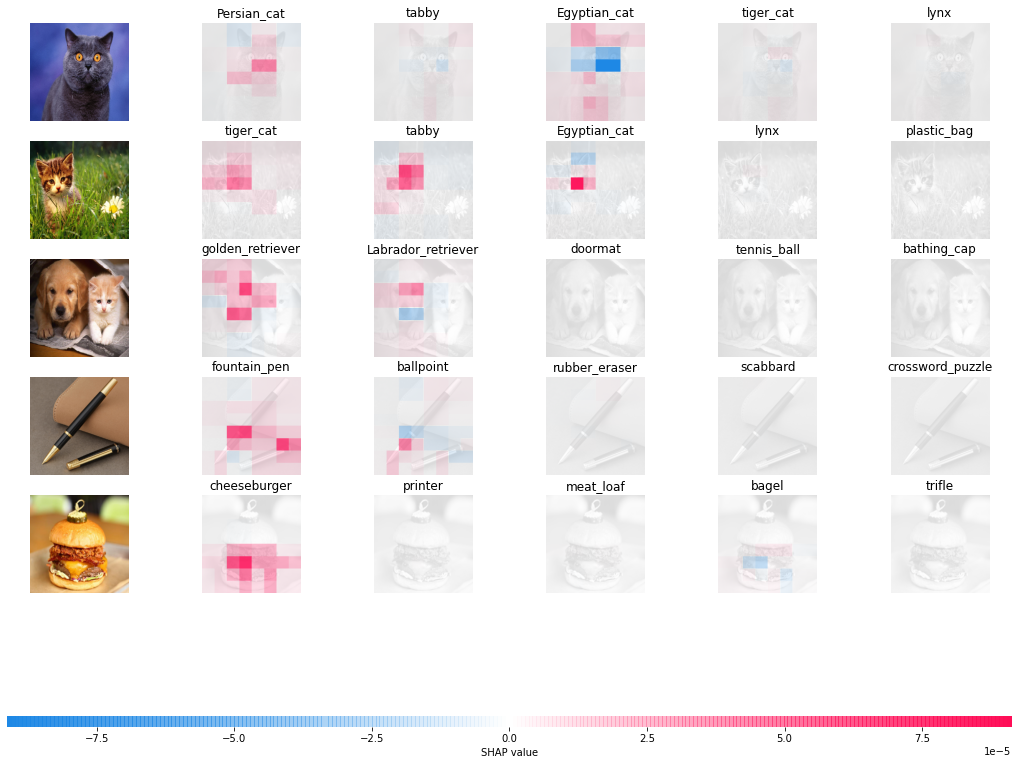

In [117]:
# output with shap values
shap.image_plot(shap_values)

In [118]:
# build the function to get the model output
def f(images):
    tmp = images.copy()
    inc_net.preprocess_input(tmp)
    newmodel=model.predict(tmp)
    return newmodel
start = time.clock()
# build a masker to mark out the partition of the input image
masker = shap.maskers.Image("inpaint_telea",images[0].shape)
end = time.clock()
print('The function cost ',end-start,' seconds.')
start = time.clock()
# generate the SHAP partition explainer
explainer = shap.Explainer(f,masker,output_names=class_names)
end = time.clock()
print('The function cost ',end-start,' seconds.')
# calculate the SHAP value
# the max number of the evaluation was 300.
shap_values = explainer(images, max_evals=500,batch_size=50,outputs=shap.Explanation.argsort.flip[:5])

The function cost  5.571086699999796  seconds.
The function cost  2.6385312999991584  seconds.


Partition explainer:  20%|██████████████▏                                                        | 1/5 [00:00<?, ?it/s]

Partition explainer:  60%|█████████████████████████████████████▊                         | 3/5 [02:11<01:06, 33.11s/it]

Partition explainer:  80%|██████████████████████████████████████████████████▍            | 4/5 [03:18<00:43, 43.35s/it]

Partition explainer: 100%|███████████████████████████████████████████████████████████████| 5/5 [04:31<00:00, 51.99s/it]

Partition explainer: 6it [05:39, 67.96s/it]                                                                            


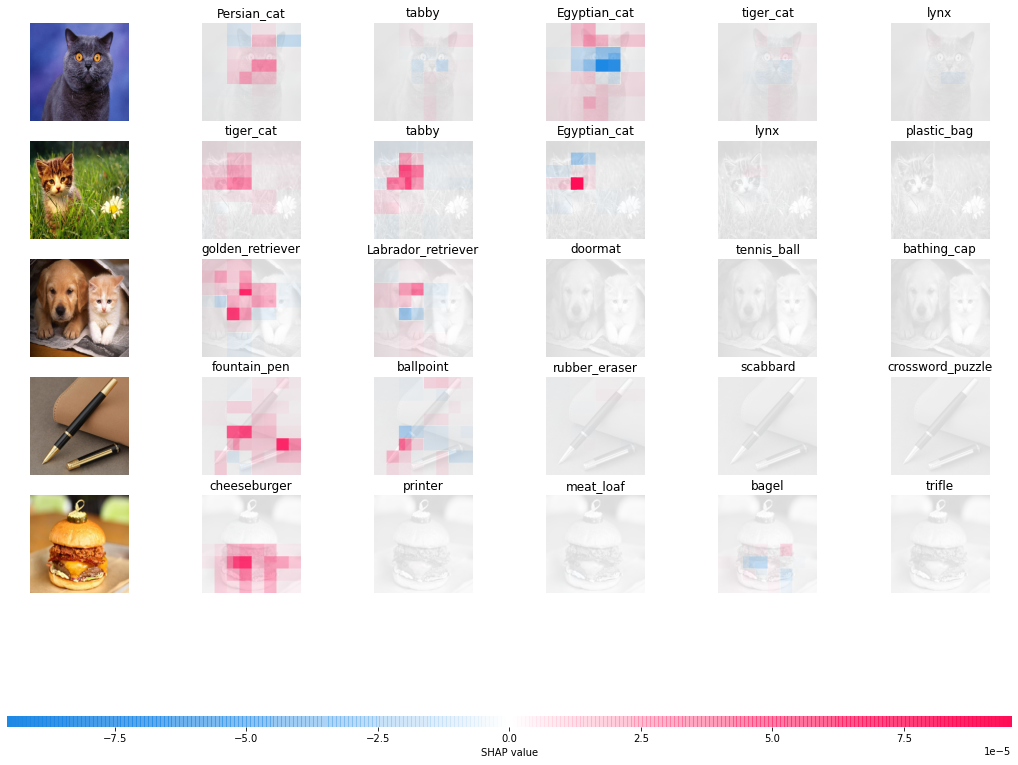

In [119]:
# output with shap values
shap.image_plot(shap_values)